In [2]:
import numpy as np
import skfuzzy as fuzz
import ipywidgets as widgets
from matplotlib import pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[-180 -179 -178 -177 -176 -175 -174 -173 -172 -171 -170 -169 -168 -167
 -166 -165 -164 -163 -162 -161 -160 -159 -158 -157 -156 -155 -154 -153
 -152 -151 -150 -149 -148 -147 -146 -145 -144 -143 -142 -141 -140 -139
 -138 -137 -136 -135 -134 -133 -132 -131 -130 -129 -128 -127 -126 -125
 -124 -123 -122 -121 -120 -119 -118 -117 -116 -115 -114 -113 -112 -111
 -110 -109 -108 -107 -106 -105 -104 -103 -102 -101 -100  -99  -98  -97
  -96  -95  -94  -93  -92  -91  -90  -89  -88  -87  -86  -85  -84  -83
  -82  -81  -80  -79  -78  -77  -76  -75  -74  -73  -72  -71  -70  -69
  -68  -67  -66  -65  -64  -63  -62  -61  -60  -59  -58  -57  -56  -55
  -54  -53  -52  -51  -50  -49  -48  -47  -46  -45  -44  -43  -42  -41
  -40  -39  -38  -37  -36  -35  -34  -33  -32  -31  -30  -29  -28  -27
  -26  -25  -24  -23  -22  -21  -20  -19  -18  -17  -16  -15  -14  -13
  -12  -11  -10   -9   -8   -7   -6   -5   -4   -3   -2   -1    0    1
    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   16 

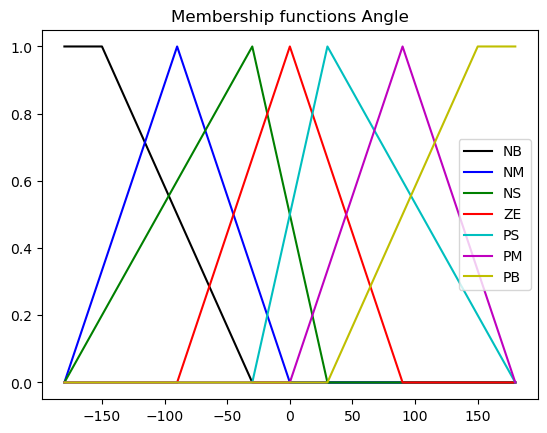

In [3]:
start = -180
stop = 181
step = 1
x = np.arange(start, stop, step)
print(x)

NB = fuzz.trapmf(x, [-180, -180, -150, -30])
NM = fuzz.trimf(x, [-180, -90, 0])
NS = fuzz.trimf(x, [-180, -30, 30])
ZE = fuzz.trimf(x, [-90, 0, 90])
PS = fuzz.trimf(x, [-30, 30, 180])
PM = fuzz.trimf(x, [0, 90, 180])
PB = fuzz.trapmf(x, [30, 150, 180, 180])

plt.figure()
plt.plot(x, NB, 'k', linewidth=1.5, label='NB')
plt.plot(x, NM, 'b', linewidth=1.5, label='NM')
plt.plot(x, NS, 'g', linewidth=1.5, label='NS')
plt.plot(x, ZE, 'r', linewidth=1.5, label='ZE')
plt.plot(x, PS, 'c', linewidth=1.5, label='PS')
plt.plot(x, PM, 'm', linewidth=1.5, label='PM')
plt.plot(x, PB, 'y', linewidth=1.5, label='PB')
plt.title('Membership functions Angle')
plt.legend()


In [4]:
def get_membership(value):
    result_nb = fuzz.interp_membership(x, NB, value)
    result_nm = fuzz.interp_membership(x, NM, value)
    result_ns = fuzz.interp_membership(x, NS, value)
    result_ze = fuzz.interp_membership(x, ZE, value)
    result_ps = fuzz.interp_membership(x, PS, value)
    result_pm = fuzz.interp_membership(x, PM, value)
    result_pb = fuzz.interp_membership(x, PB, value)
    return [result_nb, result_nm, result_ns, result_ze, result_ps, result_pm, result_pb]

In [5]:
# create a int range slider from -180 to 180 with step 1
slider = widgets.IntSlider(min=-180, max=180, step=1, value=0, description='Angle:')
# create a label
label = widgets.Label(value='')
# create a button
button = widgets.Button(description='Calculate')
# create a output
output = widgets.Output()

# create a function to handle the click event
def on_button_clicked(b):
    with output:
        # clear the output
        output.clear_output()
        # get the value of the slider
        value = slider.value
        # get the membership
        membership = get_membership(value)
        # print the membership
        print('Angle: ', value)
        print('NB: ', membership[0])
        print('NM: ', membership[1])
        print('NS: ', membership[2])
        print('ZE: ', membership[3])
        print('PS: ', membership[4])
        print('PM: ', membership[5])
        print('PB: ', membership[6])

# set the click event
button.on_click(on_button_clicked)

# display the widgets
widgets.VBox([slider, button, output, label])

